Image restoration

Consider the lena grayscale image as f(x,y) and apply gaussian filter using builtin function(let it be h). Call the resultant as g(x,y). Now find f(x,y) from g(x,y) using the formula g(x,y) = f(x,y) *h(x,y) (Hint: go through the solution of g = f*h given in the class apply the same for finding f)

In the problem 1, find f(x,y) using g(x,y) = f(x,y)*h + n where n is the noise term. Add noise n using the inbuilt function of salt and pepper noise and find f. Display the results obtained.

In [127]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

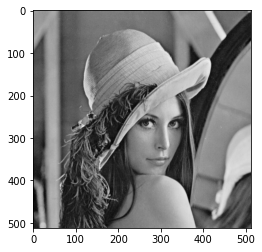

In [128]:
f=cv2.imread("lena.jpg",0)
plt.imshow(f,cmap="gray")
plt.show()

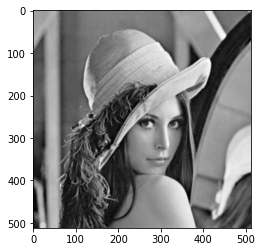

In [129]:
#Apply gaussian filter to lena image
g=cv2.GaussianBlur(f,(3,3),0)
plt.imshow(g,cmap="gray")
plt.show()

In [130]:
from cmath import exp, pi, phase
import math

def ifft(x):
    n=len(x)
    if(n<=1):
        return x
    
    even= ifft(x[0::2])
    odd = ifft(x[1::2])
    
    T = []
    for k in range(n//2):
        T.append(exp(2j*pi*k/n)*odd[k])
        
    FL = []
    FR = []
    for k in range(n//2):
        FL.append(even[k] + T[k])
        FR.append(even[k] - T[k])
        
    return FL + FR

In [131]:
def ifft_2D(image):
    res = []
    #ifft of each row
    for i in range(len(image)):
        res.append(ifft(image[i]))
        
    for i in range(len(res[0])):
        col = []
        for j in range(len(res)):
            col.append(res[j][i])
        col = ifft(col)
        
        for j in range(len(res)):
            res[j][i]=col[j]
            
    res = np.absolute(res)
    
    return res

In [132]:
from cmath import exp, pi, phase
import math
def fft(x):
    n=len(x)
    if(n<=1):
        return x
    even= fft(x[0::2])
    odd = fft(x[1::2])
    
    T = []
    for k in range(n//2):
        T.append(exp(-2j*pi*k/n)*odd[k])
        
    FL = []
    FR = []
    for k in range(n//2):
        FL.append(even[k] + T[k])
        FR.append(even[k] - T[k])
    
    return FL + FR

In [133]:
def fft_2D(image):
    res=[]
    #fft of each row
    for i in range(image.shape[0]):
        res.append(fft(image[i]))
    
    for i in range(len(res[0])):
        col=[]
        for j in range(len(res)):
            col.append(res[j][i])
        col=fft(col)

        for j in range(len(res)):
            res[j][i]=col[j] 
               
    return res

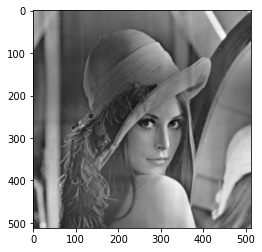

In [134]:
byh = [[16,8,16],[8,4,8],[16,8,16]] #h is 1/h
H=np.fft.fft2(byh)
G=fft_2D(g)

from scipy import signal
(G_H)=signal.correlate2d(G,H,mode='same')

idft_G_H=ifft_2D(G_H)
plt.imshow(idft_G_H,cmap="gray")
plt.show()

#1/16 * 121 242 121 -->h 
#1/h -> 16/1 ->16/1
#  
#f = iffft(G/H)

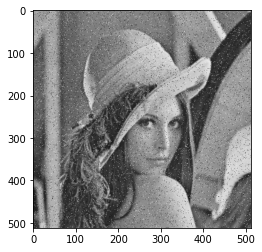

In [137]:
from skimage.util import random_noise
gsp=random_noise(g,mode='s&p')
plt.imshow(gsp,cmap='gray')
plt.show()


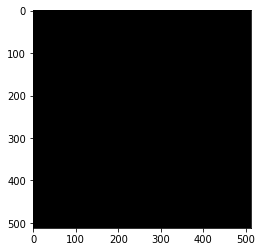

In [142]:
gsp=gsp.astype(np.uint8)
g=g.astype(np.uint8)
n=cv2.subtract(gsp,g)
plt.imshow(n,cmap="gray")
plt.show()

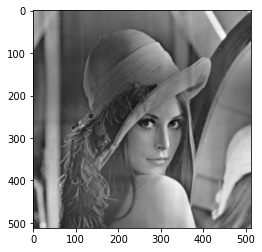

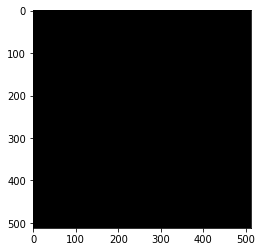

In [144]:
N=fft_2D(n)

from scipy import signal
(N_H)=signal.correlate2d(N,H,mode='same')

idft_N_H=ifft_2D(N_H)
res=cv2.subtract(idft_G_H,idft_N_H)
plt.imshow(res,cmap="gray")
plt.show()

check=cv2.subtract(idft_G_H,res)
plt.imshow(check,cmap="gray")
plt.show()
